# Representação gráfica de funções

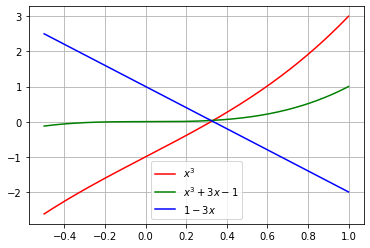

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import sympy as sy

x=sy.symbols('x')
f=x**3+3*x-1

#separando as funções
f1=x**3
f2=1-3*x

x_array=np.linspace(-.5,1,1000)
y=np.array([f.subs(x,xi) for xi in x_array])
y1=np.array([f1.subs(x,xi) for xi in x_array])
y2=np.array([f2.subs(x,xi) for xi in x_array])

plt.plot(x_array,y, 'r')
plt.plot(x_array, y1, 'g')
plt.plot(x_array, y2, 'b')
plt.grid()
plt.legend(('$x^3$','$x^3+3x-1$','$1-3x$'))
plt.show()

É possível perceber que para a funcão polinomial :

$$f(x)=x^3+3x+1$$

temos um zero no intervalo $[0.2,0.4]$, portanto utilizaremos um método iterativo posteriormente para calcularmos sua convergência. 

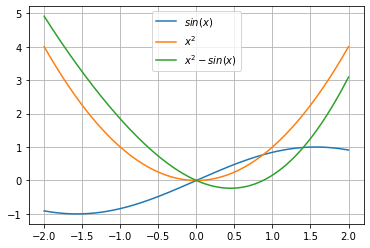

In [3]:
from sympy import sin

f4=x**2
f5=f4-sin(x)
x1=np.linspace(-2,2,1000)

y3=np.array([np.sin(xi) for xi in x1])
y4=np.array([f4.subs(x,xi) for xi in x1])
y5=np.array([f5.subs(x,xi) for xi in x1])

plt.plot(x1,y3)
plt.plot(x1,y4)
plt.plot(x1,y5)
plt.legend(('$sin(x)$','$x^2$','$x^2-sin(x)$'))
plt.grid()

E para a função:
    
$$f(x)=x^2-sin(x)$$

temos um zero no ponto $P_1(0,0)$ e outro zero desconhecido no intervalo $[0.5,1.0]$, onde ocorre a interseccção entre as funções componentes $sin(x)$ e $x^2$

# Implementação Algoritmo da Bissecção

In [4]:
N=45#número de iterações


def bisseccao(funcao,a,b,N):
    """
    1st:funcao sympy de uma variavel
    2nd:valor do limitante à esquerda
    3rd:valor do limitante à direita
    4th:N: quantidade iteracoes
    
    retorna lista dos valores iterativos da convergencia
    """
    i=1
    fa=funcao.subs(x,a)
    tol=1e-6 #tolerância, ou erro relativo
    ps=[]
    
    while(i<=N):
        p=a+(b-a)/2
        fp=funcao.subs(x,p)
        ps.append(p)
        if fp==0 or (b-a)/2 <tol:
            break
        i+=1
        if fa*fp>0:
            a=p
        else:
            b=p
    return ps

# Representação da função polinomial($f$) de intervalo $[0.2,0.4]$:

In [5]:
#utilizando os intervalos de antes

import pandas as pd

ps1=bisseccao(f,0.2,0.4,45)

pd.DataFrame({'Zero':ps1, 'Iteração':[i for i in range(1, len(ps1)+1)]})

,Zero,Iteração
0,0.300000,1
1,0.350000,2
2,0.325000,3
3,0.312500,4
4,0.318750,5
5,0.321875,6
6,0.323438,7
7,0.322656,8
8,0.322266,9
9,0.322070,10


# Representação da função senoidal ($f_5$) de intervalo $[0.5,1.0]$

In [6]:
ps2=bisseccao(f5,0.5,1,45)

pd.DataFrame({'Zero':ps2 , 'Iteração':[i for i in range(1,len(ps2)+1)]})

,Zero,Iteração
0,0.750000,1
1,0.875000,2
2,0.937500,3
3,0.906250,4
4,0.890625,5
5,0.882812,6
6,0.878906,7
7,0.876953,8
8,0.875977,9
9,0.876465,10
